## Adapt the path

In [25]:
import os
import sys
nb_dir = os.path.split(os.getcwd())[0]
if nb_dir not in sys.path:
    sys.path.append(nb_dir)

## SIR model

The original data set contains several columns. For us only the 'Confirmed', 'Fatal' and 'Recovered' columns are of interest. As a first step we map the data set to fit the SIR model as described belows

- S: Susceptible (= Population - Confirmed)
- I: Infected (=Confirmed - Recovered - Fatal)
- R: Recovered or Fatal (= Recovered + Fatal)

In [26]:
from src.data import *

In [27]:
t_0 = 0
t_end = 8000
beta=11.5
A=20
d=0.1
nu=1
b=0.022
mu0 = 10      
mu1 = 10.45
y0 = [195.3, 0.052, 4.4]

NT = t_end - t_0
time = np.linspace(t_0, t_end, NT)

data = synthesizeSIRData(beta, A, d, nu, b, mu0, mu1, t_0, t_end, y0)
combined_data = createDataSet(beta, A, d, nu, b, mu0, mu1, t_0, t_end, y0, 0.003, 0.005)

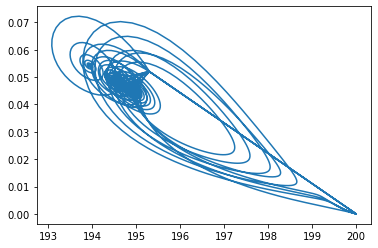

In [28]:
import matplotlib.pyplot as plt
plt.plot(combined_data['Susceptible'], combined_data['Infected'])

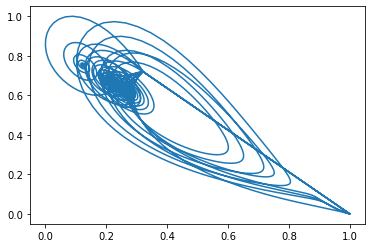

In [29]:
df = normalizeDataSet(combined_data)
plt.plot(df['Susceptible'], df['Infected'])

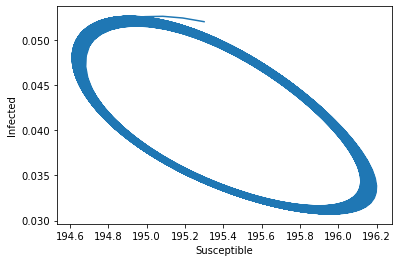

In [30]:
fig = plt.figure()
plt.xlabel('Susceptible')
plt.ylabel('Infected')
plt.plot(data['Susceptible'], data['Infected']);
fig.savefig('euler_approx.png', dpi=fig.dpi)

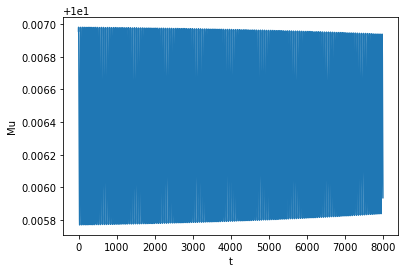

In [31]:
fig = plt.figure()
plt.xlabel('t')
plt.ylabel('Mu')
plt.plot(time, data['Mu'])
#fig.savefig('mu_approx.png', dpi=fig.dpi)

In [ ]:
#generateSIRFile(data, "SIR.csv")
#generateSIRFile(combined_data, "CombinedSIR.csv")
#generateSIRFile(df, "NormalizedSIRData-Mu.csv")

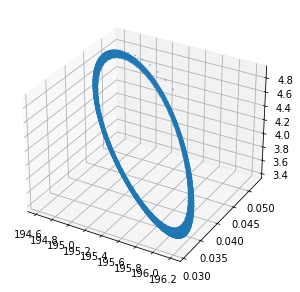

In [37]:
from mpl_toolkits.mplot3d import Axes3D

fig=plt.figure(figsize=(5,5))
ax=fig.add_subplot(111,projection="3d")
ax.scatter(data['Susceptible'], data['Infected'], data['Recovered'], s=1, cmap="bwr");